In [1]:
# Name: Sivaram Mandava
# NetID: sxm169331

import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv2D, GlobalMaxPooling1D
from keras.preprocessing.text import text_to_word_sequence
import matplotlib.pyplot as plt
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

stopWords = stopwords.words('english')


[nltk_data] Downloading package punkt to
[nltk_data]     /Users/sivarammandava/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/sivarammandava/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Using TensorFlow backend.


In [2]:
# Question-1.
DF = pd.read_csv('train.csv')
trainX = DF.loc[:, 'sentence'].values
print(trainX[:10])
trainY = DF.loc[:, 'label'].values
print(trainY[:10])

DF = pd.read_csv('test.csv')
testX = DF.loc[:, 'sentence'].values
print(testX[:10])
testY = DF.loc[:, 'label'].values
print(testY[:10])

["You can't relate with them, hell you barely can understand them.  "
 "The instructions didn't explain that a microphone jack could be used."
 "I liked the way Dustin Hoffman's character was ready to do just about everything to stay with his son.  "
 'I really loved the story line and the poler bear was kinda cute.But if anyone has a question about Fort Steele, just ask away:)  '
 'Unfortunately, inexperience of direction meant that scene after scene passed with little in the way of dramatic tension or conflict.  '
 'I love this device.'
 'The headset fulfills my requirements so I am happy with my purchase.'
 'I knew when I saw the film that more great things were to come from this gifted actor.  '
 "There was a few pathetic attempts to give the characters some depth, but it didn't really work into the rest of the plot.  "
 'I recently had problems where I could not stay connected for more than 10 minutes before being disconnected.']
[0 0 1 1 0 1 1 1 0 0]
["I'd love to go back." 'stay

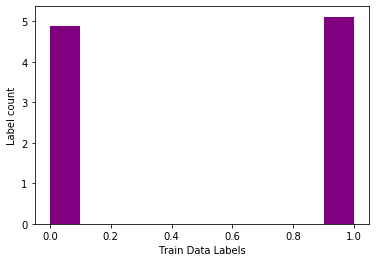

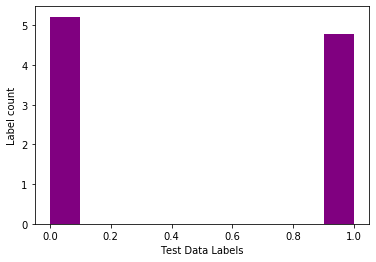

In [4]:
plt.hist(trainY, density = True, color = 'purple')
plt.xlabel('Train Data Labels')
plt.ylabel('Label count')
plt.show()
plt.hist(testY, density = True, color = 'purple')
plt.xlabel('Test Data Labels')
plt.ylabel('Label count')
plt.show()

In [15]:
def tokenize(text):
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if not word in stopWords]
    return tokens

vect = TfidfVectorizer(tokenizer=tokenize, use_idf=True)
train_vector = vect.fit_transform(trainX)
test_vector = vect.transform(testX)

In [6]:
Model = MultinomialNB()
Model.fit(train_vector, trainY)
predicted = Model.predict(test_vector)
print("Naive Bayes shows:", accuracy_score(predicted, testY))
print(confusion_matrix(predicted, testY))

Naive Bayes shows: 0.8018181818181818
[[215  37]
 [ 72 226]]


In [7]:
Model = LogisticRegression(solver='lbfgs')
Model.fit(train_vector, trainY)
predicted = Model.predict(test_vector)
print("Logistic Regression:", accuracy_score(predicted, testY))
print(confusion_matrix(predicted, testY))

Logistic Regression: 0.7818181818181819
[[234  67]
 [ 53 196]]


In [8]:
# Question-6.
Model = MLPClassifier(activation='relu', max_iter=500)
Model.fit(train_vector, trainY)
predicted = Model.predict(test_vector)
print("Neural Network ('For Relu'):", accuracy_score(predicted, testY))
print(confusion_matrix(predicted, testY))

Model = MLPClassifier(activation='identity', max_iter=500)
Model.fit(train_vector, trainY)
predicted = Model.predict(test_vector)
print("Neural Network ('FOr Identity'):", accuracy_score(predicted, testY))
print(confusion_matrix(predicted, testY))

Model = MLPClassifier(activation='logistic', max_iter=500)
Model.fit(train_vector, trainY)
predicted = Model.predict(test_vector)
print("Neural Network ('For Logistic'):", accuracy_score(predicted, testY))
print(confusion_matrix(predicted, testY))

Model = MLPClassifier(activation='tanh', max_iter=500)
Model.fit(train_vector, trainY)
predicted = Model.predict(test_vector)
print("Neural Network ('For TanH'):", accuracy_score(predicted, testY))
print(confusion_matrix(predicted, testY))

Neural Network ('For Relu'): 0.7636363636363637
[[215  58]
 [ 72 205]]
Neural Network ('FOr Identity'): 0.7454545454545455
[[210  63]
 [ 77 200]]
Neural Network ('For Logistic'): 0.7636363636363637
[[215  58]
 [ 72 205]]
Neural Network ('For TanH'): 0.7418181818181818
[[210  65]
 [ 77 198]]


In [9]:
# Question-7.
'''
The Various Results:
For the Naive Bayes Confusion Matrix: [[215  37]
                              [ 72 226]]
For the Naive Bayes Accuracy Score: 0.8018181818181818

For the Logistic Regression Confusion Matrix: [[234  67]
                                      [ 53 196]]
FOr the Logistic Regression Accuracy Score: 0.7818181818181819


Neural Networks: 
FOr iterations = 200.

For the Neural Network Confusion Matrix: [[213  59]
                                 [ 74 204]]
For the Neural Network ('FOr relu') Accuracy Score: 0.7581818181818182

For the Neural Network Confusion Matrix: [[211  64]
                                 [ 76 199]]
For the Neural Network ('FOr identity') Accuracy Score: 0.7454545454545455

For the Neural Network Confusion Matrix: [[216  56]
                                 [ 71 207]]
For the Neural Network ('For logistic') Accuracy Score: 0.769090909090909

For the Neural Network Confusion Matrix: [[210  64]
                                 [ 77 199]]
For the Neural Network ('For tanh') Accuracy Score: 0.7436363636363637


For iterations = 500
For the Neural Network Confusion Matrix: [[213  58]
                                 [ 74 205]]
For the Neural Network ('For relu') Accuracy Score: 0.76

For the Neural Network Confusion Matrix: [[212  64]
                                 [ 75 199]]
For the Neural Network ('For the identity') Accuracy Score: 0.7472727272727273

For the Neural Network Confusion Matrix: [[216  59]
                                 [ 71 204]]
For the Neural Network ('For the logistic') Accuracy Score: 0.7636363636363637

For the Neural Network Confusion Matrix: [[209  63]
                                 [ 78 200]]
For the Neural Network ('For the tanh') Accuracy Score: 0.7436363636363637



Based on this we can see that Naive Bayes gives us the best accuracy. It gives us the best ratio of true values 
against the False values. As you can see the confusion matrix for most of them are similar. But when it comes to Naive Bayes and 
Logistic Regression it is a little different. based on how you want the output, you should decide what method to follow. 

'''


"\nThe Various Results:\nFor the Naive Bayes Confusion Matrix: [[215  37]\n                              [ 72 226]]\nFor the Naive Bayes Accuracy Score: 0.8018181818181818\n\nFor the Logistic Regression Confusion Matrix: [[234  67]\n                                      [ 53 196]]\nFOr the Logistic Regression Accuracy Score: 0.7818181818181819\n\n\nNeural Networks: \nFOr iterations = 200.\n\nFor the Neural Network Confusion Matrix: [[213  59]\n                                 [ 74 204]]\nFor the Neural Network ('FOr relu') Accuracy Score: 0.7581818181818182\n\nFor the Neural Network Confusion Matrix: [[211  64]\n                                 [ 76 199]]\nFor the Neural Network ('FOr identity') Accuracy Score: 0.7454545454545455\n\nFor the Neural Network Confusion Matrix: [[216  56]\n                                 [ 71 207]]\nFor the Neural Network ('For logistic') Accuracy Score: 0.769090909090909\n\nFor the Neural Network Confusion Matrix: [[210  64]\n                             

In [10]:
Model = Sequential()
Model.add(Dense(1, input_dim=4690))
Model.add(Activation('relu'))
Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
Model.fit(train_vector, trainY)
Score = Model.evaluate(test_vector, testY)
print("Keras Sequential Model ('relu'):", Score)

Model = Sequential()
Model.add(Dense(1, input_dim=4690))
Model.add(Activation('softmax'))
Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
Model.fit(train_vector, trainY)
Score = Model.evaluate(test_vector, testY)
print("Keras Sequential Model ('softmax'):", Score)

Epoch 1/1
550/550 [==============================] - 0s 94us/step
Keras Sequential Model ('relu'): [1.2385457836497913, 0.5218181610107422]
Epoch 1/1
550/550 [==============================] - 0s 55us/step
Keras Sequential Model ('softmax'): [8.001162890520963, 0.4781818091869354]


In [11]:
# Question-9
'''
We have ran multiple models and we have noticed that this is similar to the ones in step 7. This is best seen in relu and Naive Bayes.
We can see this in the COnfusion Matroix for it.
'''

'\nWe have ran multiple models and we have noticed that this is similar to the ones in step 7. This is best seen in relu and Naive Bayes.\nWe can see this in the COnfusion Matroix for it.\n'

In [26]:


DF = pd.read_csv('train.csv')
trainX = DF.loc[:, 'sentence'].values
print(trainX[:10])
trainY = DF.loc[:, 'label'].values
print(trainY[:10])

DF = pd.read_csv('test.csv')
testX = DF.loc[:, 'sentence'].values
print(testX[:10])
testY = DF.loc[:, 'label'].values
print(testY[:10])

def tokenize(text):
    tokens = text_to_word_sequence(text)
    tokens = [word for word in tokens if not word in stopWords]
    return tokens

vect = TfidfVectorizer(tokenizer=tokenize, use_idf=True)
train_vector = vect.fit_transform(trainX)
test_vector = vect.transform(testX)

Model = Sequential()
Model.add(Dense(1, input_dim=4581))
Model.add(Activation('relu'))
Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
print("Keras Sequential Model ('relu') using keras_preprocessing text tokenizer:", Score)

Model = Sequential()
Model.add(Dense(1, input_dim=4581))
Model.add(Activation('softmax'))
Model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
print("Keras Sequential Model ('softmax') using keras_preprocessing text tokenizer::", Score)

["You can't relate with them, hell you barely can understand them.  "
 "The instructions didn't explain that a microphone jack could be used."
 "I liked the way Dustin Hoffman's character was ready to do just about everything to stay with his son.  "
 'I really loved the story line and the poler bear was kinda cute.But if anyone has a question about Fort Steele, just ask away:)  '
 'Unfortunately, inexperience of direction meant that scene after scene passed with little in the way of dramatic tension or conflict.  '
 'I love this device.'
 'The headset fulfills my requirements so I am happy with my purchase.'
 'I knew when I saw the film that more great things were to come from this gifted actor.  '
 "There was a few pathetic attempts to give the characters some depth, but it didn't really work into the rest of the plot.  "
 'I recently had problems where I could not stay connected for more than 10 minutes before being disconnected.']
[0 0 1 1 0 1 1 1 0 0]
["I'd love to go back." 'stay

In [ ]:
# Question 11

import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])


#check image shape
X_train[0].shape

#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]